<h1 dir="rtl" align="left">
Social Networks HW1 - University of Tehran - Fall 1404
</h1>


<div>
Name: Amir Hoseein Farazmand
<br/>
Student number : 810104221
</div>

# Question 1: Small World Phenomena in Random Networks

# **Imports**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import linregress

# Import your custom module
import Small_World_Q1 as sw

In [3]:
# Logarithmically spaced values from N=500 to N=5000
n_values = np.logspace(np.log10(500), np.log10(5000), num=30).astype(int)

# Dictionary to store results
results = {
    '1D': {'n': [], 'd': []},
    '2D': {'n': [], 'd': []},
    '3D': {'n': [], 'd': []},
    'RN': {'n': [], 'd': []}
}

print(f"Starting simulation for N values: {n_values}")

for n in n_values:
    print(f"Processing N = {n}...")
    
    # 1D Lattice
    g1 = sw.generate_1d_lattice(n)
    results['1D']['n'].append(g1.number_of_nodes())
    results['1D']['d'].append(nx.average_shortest_path_length(g1))
    
    # 2D Lattice
    g2 = sw.generate_2d_lattice(n)
    if nx.is_connected(g2):
        results['2D']['n'].append(g2.number_of_nodes())
        results['2D']['d'].append(nx.average_shortest_path_length(g2))
    
    # 3D Lattice
    g3 = sw.generate_3d_lattice(n)
    if nx.is_connected(g3):
        results['3D']['n'].append(g3.number_of_nodes())
        results['3D']['d'].append(nx.average_shortest_path_length(g3))

    # ER Network
    g_rn = sw.generate_random_network(n, avg_k=4)
    if not nx.is_connected(g_rn):
        # Use largest connected component if graph is disconnected
        largest_cc = max(nx.connected_components(g_rn), key=len)
        g_rn = g_rn.subgraph(largest_cc).copy()
    
    results['RN']['n'].append(g_rn.number_of_nodes())
    results['RN']['d'].append(nx.average_shortest_path_length(g_rn))

print("Simulation complete.")

Starting simulation for N values: [ 499  541  586  634  686  743  805  871  943 1021 1106 1197 1296 1403
 1519 1645 1781 1928 2087 2260 2446 2649 2868 3105 3361 3639 3940 4265
 4618 4999]
Processing N = 499...
Processing N = 541...
Processing N = 586...
Processing N = 634...
Processing N = 686...
Processing N = 743...
Processing N = 805...
Processing N = 871...
Processing N = 943...
Processing N = 1021...
Processing N = 1106...
Processing N = 1197...
Processing N = 1296...
Processing N = 1403...
Processing N = 1519...
Processing N = 1645...
Processing N = 1781...
Processing N = 1928...
Processing N = 2087...
Processing N = 2260...
Processing N = 2446...
Processing N = 2649...
Processing N = 2868...
Processing N = 3105...
Processing N = 3361...
Processing N = 3639...
Processing N = 3940...
Processing N = 4265...
Processing N = 4618...
Processing N = 4999...
Simulation complete.




## Network Construction and Simulation

Here, we generate four different network topologies to analyze how their Average Shortest Path Length ($\langle d \rangle$) scales with the network size ($N$).

**Networks generated:**
1.  **1D Lattice:** A ring graph ($k=2$).
2.  **2D Lattice:** A grid graph with periodic boundary conditions (Torus).
3.  **3D Lattice:** A cubic grid graph.
4.  **Random Network (RN):** Erdos-Renyi graph with $\langle k \rangle \approx 4$.

**Implementation:**
We perform a parameter sweep over $N$ (30 $N$ values logarithmically spaced from 500 to 5000). For each $N$, we generate the graphs and calculate $\langle d \rangle$.

Scaling Exponents (Slope of Log-Log fit)
1D Lattice: Exponent (slope) = 0.9993
2D Lattice: Exponent (slope) = 0.4996
3D Lattice: Exponent (slope) = 0.3351
Random Network: Exponent (slope) = 0.1302


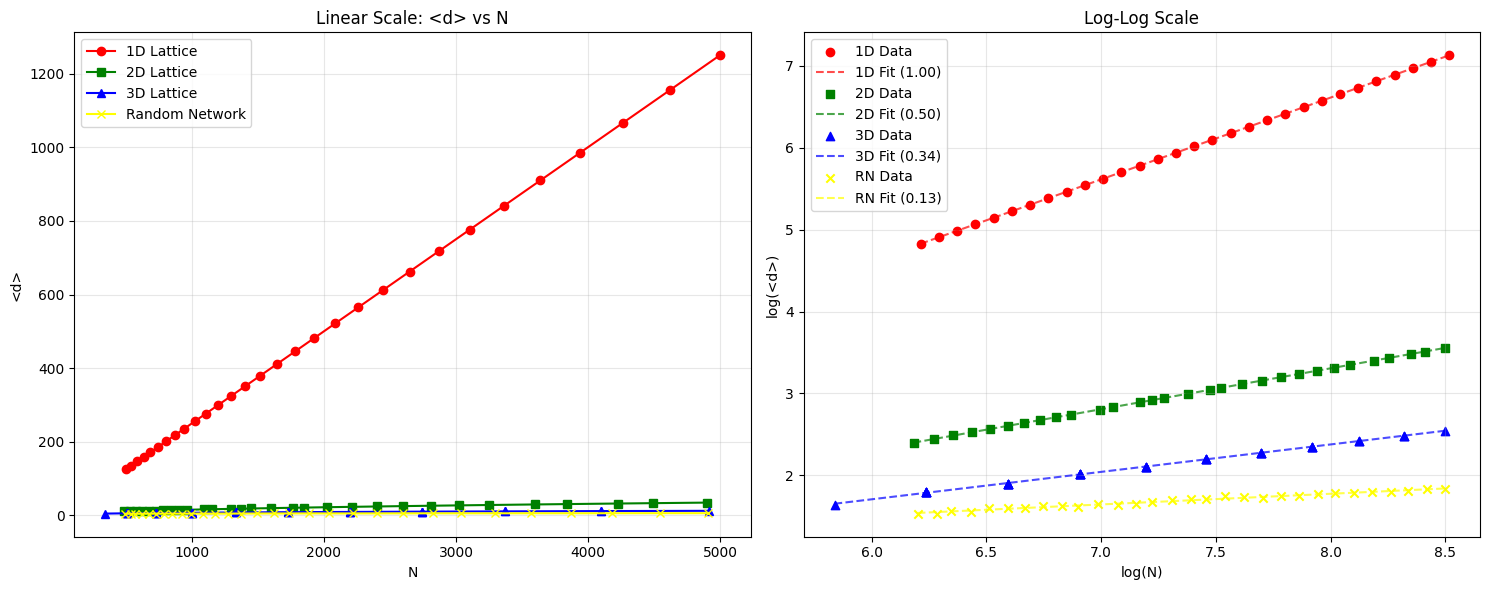

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

styles = {
    '1D': {'c': 'red', 'm': 'o', 'label': '1D Lattice'},
    '2D': {'c': 'green', 'm': 's', 'label': '2D Lattice'},
    '3D': {'c': 'blue', 'm': '^', 'label': '3D Lattice'},
    'RN': {'c': 'yellow', 'm': 'x', 'label': 'Random Network'}
}

print("Scaling Exponents (Slope of Log-Log fit)")

for key in results:
    n_data = np.array(results[key]['n'])
    d_data = np.array(results[key]['d'])
    
    # Linear Plot
    ax1.plot(n_data, d_data, color=styles[key]['c'], marker=styles[key]['m'], label=styles[key]['label'])
    
    # Log-Log Plot Analysis
    log_n = np.log(n_data)
    log_d = np.log(d_data)
    
    # Linear Regression to find exponent
    slope, intercept, _, _, _ = linregress(log_n, log_d)
    
    # Plot Data points
    ax2.scatter(log_n, log_d, color=styles[key]['c'], marker=styles[key]['m'], label=f"{key} Data")
    # Plot Fit line
    ax2.plot(log_n, slope*log_n + intercept, color=styles[key]['c'], linestyle='--', alpha=0.7, label=f"{key} Fit ({slope:.2f})")
    
    print(f"{styles[key]['label']}: Exponent (slope) = {slope:.4f}")

# Formatting
ax1.set_title("Linear Scale: <d> vs N")
ax1.set_xlabel("N")
ax1.set_ylabel("<d>")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_title("Log-Log Scale")
ax2.set_xlabel("log(N)")
ax2.set_ylabel("log(<d>)")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## (b) Scaling Analysis and Visualization

We compare the simulation results with theoretical predictions using two plots:
1.  **Linear Plot:** $\langle d \rangle$ vs $N$.
2.  **Log-Log Plot:** $\log(\langle d \rangle)$ vs $\log(N)$.

We also perform linear regression on the log-log data to extract the scaling exponents.

### 1. Comparison with Theoretical Predictions

Based on the simulation results (slopes from the log-log fit), we observe:

*   **1D Lattice:** The simulated exponent is **0.9993**. This matches the theoretical prediction of $N^1$.
*   **2D Lattice:** The simulated exponent is **0.4996**. This matches the theoretical prediction of $N^{1/2} = N^{0.5}$ .
*   **3D Lattice:** The simulated exponent is **0.3351**. This is very close to the theoretical prediction of $N^{1/3} \approx N^{0.33}$.
*   **Random Network:** The slope is **0.1302**. This is significantly lower than any lattice, meaning the ER network has small-world property 


**Do your simulated exponents match the theoretical dimensionality (1/D)?**

Yes, the simulated exponents for the lattices almost match the theoretical dimensionality ($1/D$), however the graph doesn't exactly match theorical plots, because for 1D lattice, d=1200 is much larger than 2D and 3D lattice which makes plots look slightly different, but the exponents match and simiulation is indeed close to theoratical dimensionality.

### 2. Why Random Networks Scale Logarithmically?

Regular lattices have a limitation in making connection to neightbors, they can only conncet to nodes that are physicaly close to them (resulting in polynomial growth of path length), **Random Networks** allow conncection between any two nodes with probability $p$.

These random connections act as **"shortcuts"** (or long-range links) that bridge distant parts of the network instantly. Even a small number of these shortcuts dramatically reduces the number of hops needed to cross the graph, leading to the "Small World" property where $\langle d \rangle$ scales as $\ln N$.